# Education Analysis

Work by: Nicholas Konovalenko<br>
Team 3

## Current Work
For this project I focused on looking at the educational attainment for Tracts 64, 102, 105, and 110. I found that within tracts 64 & 105, there is a much smaller percentage of people that achieves to top levels of education compared to tracts 102 & 110. I further break this down by demographic (Race & Gender) which show some stark differences. We saw the the percentage graduation rate for White-Alone Males and Females was significantly higher than Black-Alone Males and Females. In fact, in Census Tract 64 the high school graduation rate for Black-Alone Females was barely above 50%. Additionally, I looked at median earnings. For 4-year degrees, the median earnings across the tracts was relatively even. However, for the category 'Some college or associate's degree', the median earnings in CT 102/110 were 3 times higher than CT 64/105 ($80,000 vs $30,000 per year). Finally, I took a look at access to computers, and found no visible correlation between computer access and education level attained.

## Challenges Faced
The current biggeset challenge faced, was the lack of all the tracts in all the years. This made it more difficult to do year-to-year analysis.

## Next Steps
I think that the differences between schools must be analyzed much more closely. Why is the graduation rate for Census Tract 64 so much lower than in Census Tract 102? Why are the median earnings in CT 64 so much lower for the same level of education?


# How to run
All the data is loaded to the 'Education Analysis/data/' directory, and all the plots get saved to the 'Education Analysis/Plots' directory. To run this, use either a jupyter notebook, or google colab and run all cells.

## Importing the data

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'data/'

files = [
    'ACSST5Y2010.S1501.csv',
    'ACSST5Y2011.S1501.csv',
    'ACSST5Y2012.S1501.csv',
    'ACSST5Y2013.S1501.csv',
    'ACSST5Y2014.S1501.csv',
    'ACSST5Y2015.S1501.csv',
    'ACSST5Y2016.S1501.csv',
    'ACSST5Y2017.S1501.csv',
    'ACSST5Y2018.S1501.csv',
    'ACSST5Y2019.S1501.csv',
    'ACSST5Y2020.S1501.csv',
    'ACSST5Y2021.S1501.csv'
]

df = pd.DataFrame()

## Load files into df

# this currently only reads the 2021 CSV, as tracts are missing from the others.
for file in files[-1:]:
    fpath = PATH + file
    
    # Load each file into a temporary DataFrame
    temp_df = pd.read_csv(fpath)
    
    # Append the temporary DataFrame to the main DataFrame
    df = df.append(temp_df, ignore_index=True)


C:\Users\konic\AppData\Local\Temp\ipykernel_15036\2308872588.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


In [2]:
# Rename the columns using the .str.replace() method
df.columns = df.columns.str.replace('Census Tract ([\d\.]+), District of Columbia, District of Columbia!!([^!]+)!!([^!]+)', r'Tract \1, \2 \3')

C:\Users\konic\AppData\Local\Temp\ipykernel_15036\3899270774.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('Census Tract ([\d\.]+), District of Columbia, District of Columbia!!([^!]+)!!([^!]+)', r'Tract \1, \2 \3')


# Population 18 to 24 years old
Let's start by looking at the overall number of student estimates.

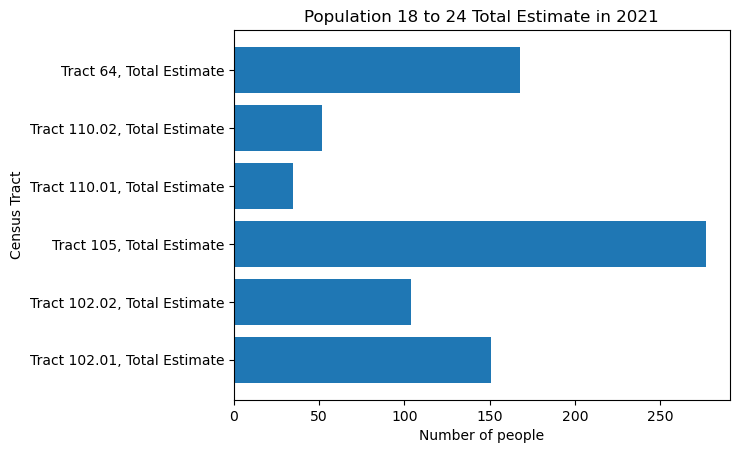

In [3]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if 'Tract' in col and 'Total' in col and 'Estimate' in col]
tract_data = df.loc[1, tract_cols]
tract_data = tract_data.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a horizontal bar chart
ax.barh(tract_data.index, tract_data.values.astype(int))

# Set the axis labels and title
ax.set_xlabel('Number of people')
ax.set_ylabel('Census Tract')
ax.set_title('Population 18 to 24 Total Estimate in 2021')

# Display the plot
plt.show()

<AxesSubplot:title={'center':'Degree Breakdown Ages 18-24 in 2021'}, xlabel='Number of People', ylabel='Tract'>

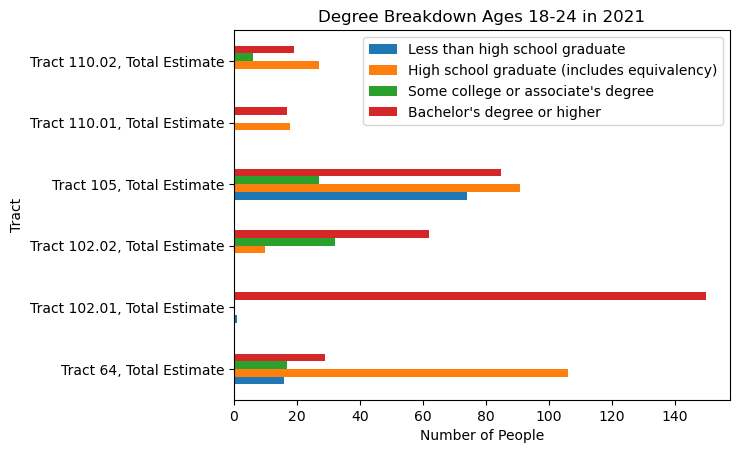

In [8]:
# This is the overall breakdown, let's try breaking down by degree

# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if 'Tract' in col and 'Total' in col and 'Estimate' in col]
tract_data = df.loc[2:5, tract_cols]
tract_data = tract_data.sort_index()


##################### Rename the rows
labels = ['Less than high school graduate', 'High school graduate (includes equivalency)', 
          'Some college or associate\'s degree', 'Bachelor\'s degree or higher']

for i in range(len(labels)):
    tract_data = tract_data.rename(index={2+i: labels[i]})
    
##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].astype(int)
#####################
tract_data = tract_data.T

bar_plot = tract_data.plot(kind='barh', title='Degree Breakdown Ages 18-24 in 2021')
bar_plot.set_xlabel('Number of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/tract_18_24_breakdown.png')
bar_plot


## What are the takeaways from this graph?

We can see that Tract 102 has the highest number of Bachelor's degree or higher graduates. Infact, Tract 102.01 is composed of essentially only 4-year degree graduates (for those between the ages of 18-24). Tract 110 is also heavily made up of college graduates. On the other hand, a large chunk of Tract 64 contains high school graduates, and Tract 105 has double the number of High school graduate + High school dropout compared to the number of 4-year graduates it has.

This shows that 18 to 24 year olds in Tracts 102 and 110 continue to get more advanced education, while those in Tracts 64 and 105 struggle to do the same.

# Population 25+

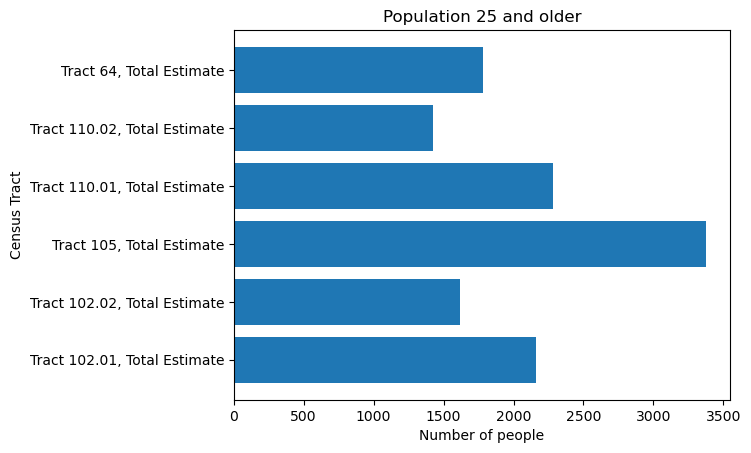

In [10]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if 'Tract' in col and 'Total' in col and 'Estimate' in col]
tract_data = df.loc[6, tract_cols]
tract_data = tract_data.str.replace(',', '').astype(int)
tract_data = tract_data.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a horizontal bar chart
ax.barh(tract_data.index, tract_data.values.astype(int))

# Set the axis labels and title
ax.set_xlabel('Number of people')
ax.set_ylabel('Census Tract')
ax.set_title('Population 25 and older')

# Display the plot
plt.show()

<AxesSubplot:title={'center':'Degree Breakdown Ages 25+ in 2021'}, xlabel='Number of People', ylabel='Tract'>

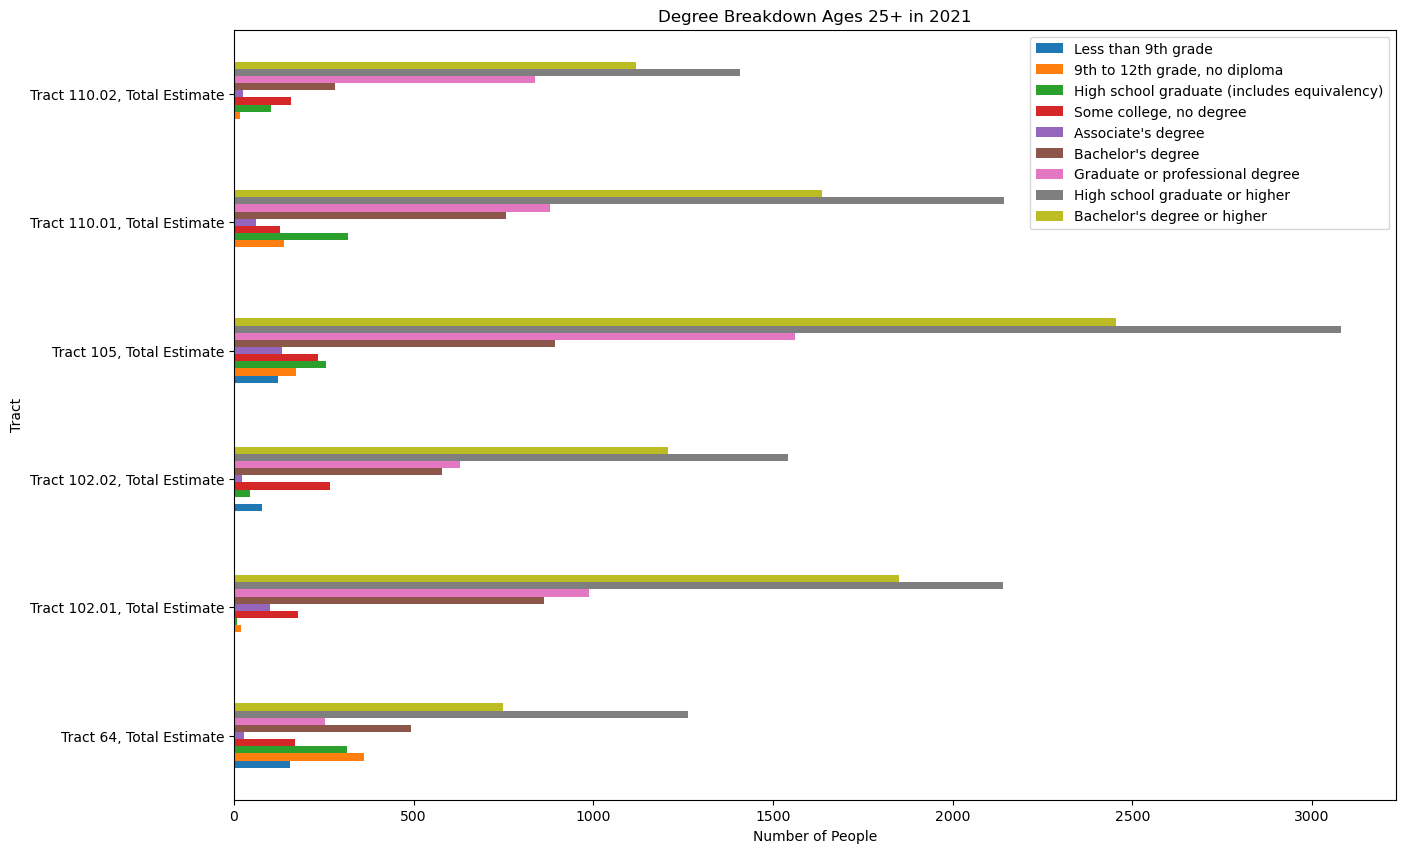

In [11]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if ('Tract' in col and 'Total' in col and 'Estimate' in col) or 'Label (Grouping)' in col]
tract_data = df.loc[7:15, tract_cols]
tract_data = tract_data.sort_index()

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'
for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')


for i in range(len(labels)):
    tract_data = tract_data.rename(index={7+i: labels[i]})

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)

##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace(',', '').astype(int)
    
#####################
tract_data = tract_data.T
bar_plot = tract_data.plot(kind='barh', title='Degree Breakdown Ages 25+ in 2021', figsize=(15, 10))
bar_plot.set_xlabel('Number of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/tract_25plus_degree_breakdown.png')
bar_plot

<AxesSubplot:title={'center':'Percentage Degree Breakdown Ages 25+ in 2021'}, xlabel='Percentage of People', ylabel='Tract'>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

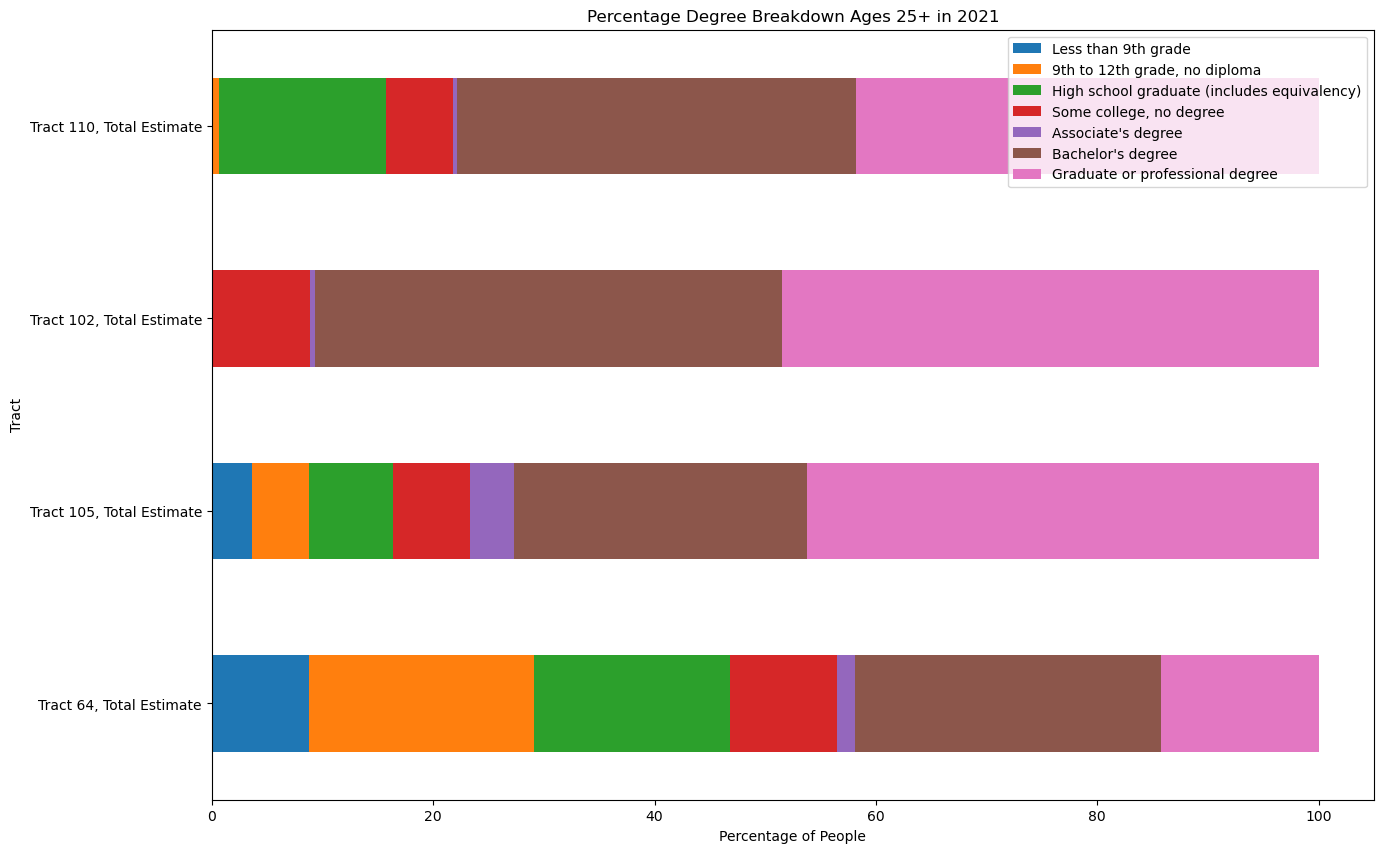

In [13]:
# Now we want to see the percentages of each degree type

tract_cols = [col for col in df.columns if ('Tract' in col and 'Total' in col and 'Estimate' in col) or 'Label (Grouping)' in col]
tract_data = df.loc[7:15, tract_cols]
tract_data = tract_data.sort_index()

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'
for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')


for i in range(len(labels)):
    tract_data = tract_data.rename(index={7+i: labels[i]})

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)

# Drop the "degree or higher rows"
tract_data = tract_data.drop(tract_data.index.values[-1])
tract_data = tract_data.drop(tract_data.index.values[-1])

##################### Combine decimal tracts
tract_data['Tract 102, Total Estimate'] = tract_data['Tract 102.01, Total Estimate'] + tract_data['Tract 102.02, Total Estimate']
tract_data['Tract 110, Total Estimate'] = tract_data['Tract 110.01, Total Estimate'] + tract_data['Tract 110.02, Total Estimate']

decimal_tracts = ['Tract 102.01, Total Estimate', 'Tract 102.02, Total Estimate', 'Tract 110.01, Total Estimate', 'Tract 110.02, Total Estimate']
for tract in decimal_tracts:
    tract_data = tract_data.drop(tract, axis=1)
##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace(',', '').astype(int)
    
#####################

tract_data = tract_data.T

# Turn into percentages
tracts = tract_data.T.columns.values
sums = tract_data.T.sum()

tract_data = tract_data.T

for label in tracts:
    tract_data[label] = tract_data[label] / sums.T[label] * 100

for col in tract_data.columns:
    plot_label = col.replace(', Total Estimate', '')
    sorted_data = tract_data[[col]].sort_values(by=col, ascending=False)
    pie_plot = sorted_data.plot(kind='pie', y=col, title=f'Percentage {plot_label} Degree Breakdown Ages 25+ in 2021', figsize=(15, 10))
    pie_plot.set_xlabel('')
    pie_plot.set_ylabel('')
    plt.savefig(f'Plots/{col}_pie_chart.png')
    plt.clf()

tract_data = tract_data.T
bar_plot = tract_data.plot(kind='barh', stacked=True, title='Percentage Degree Breakdown Ages 25+ in 2021', figsize=(15, 10),)
bar_plot.set_xlabel('Percentage of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/tract_25plus_percentage_breakdown.png')
bar_plot

## What are the takeaways from this graph?
At a first glance, the degree breakdown is a lot to take in, and quite hard to read. However, by playing around with the data, we can reformat it to see the percentage level for each degree type for each tract.

What we can see here, is that Tracts 110 and 102 are primarily made up of advanced degrees. For Tract 110, roughly 40% have a bachelor's and 40% have a graduate/professional degree. In Tract 102, that combination makes up almost 90% of those above 25. 

On the other hand, looking at Tracts 105 and 64, we start to see a big shake up. In Tract 64, roughly half of those older than 25 have **at most** have a high school education. Roughly 10% didn't go to high school at all, and another 20% didn't graduate from high school. 

## Demographic Information

<AxesSubplot:title={'center':'Percentage White Alone Male Graduation in 2021'}, xlabel='Percentage of People', ylabel='Tract'>

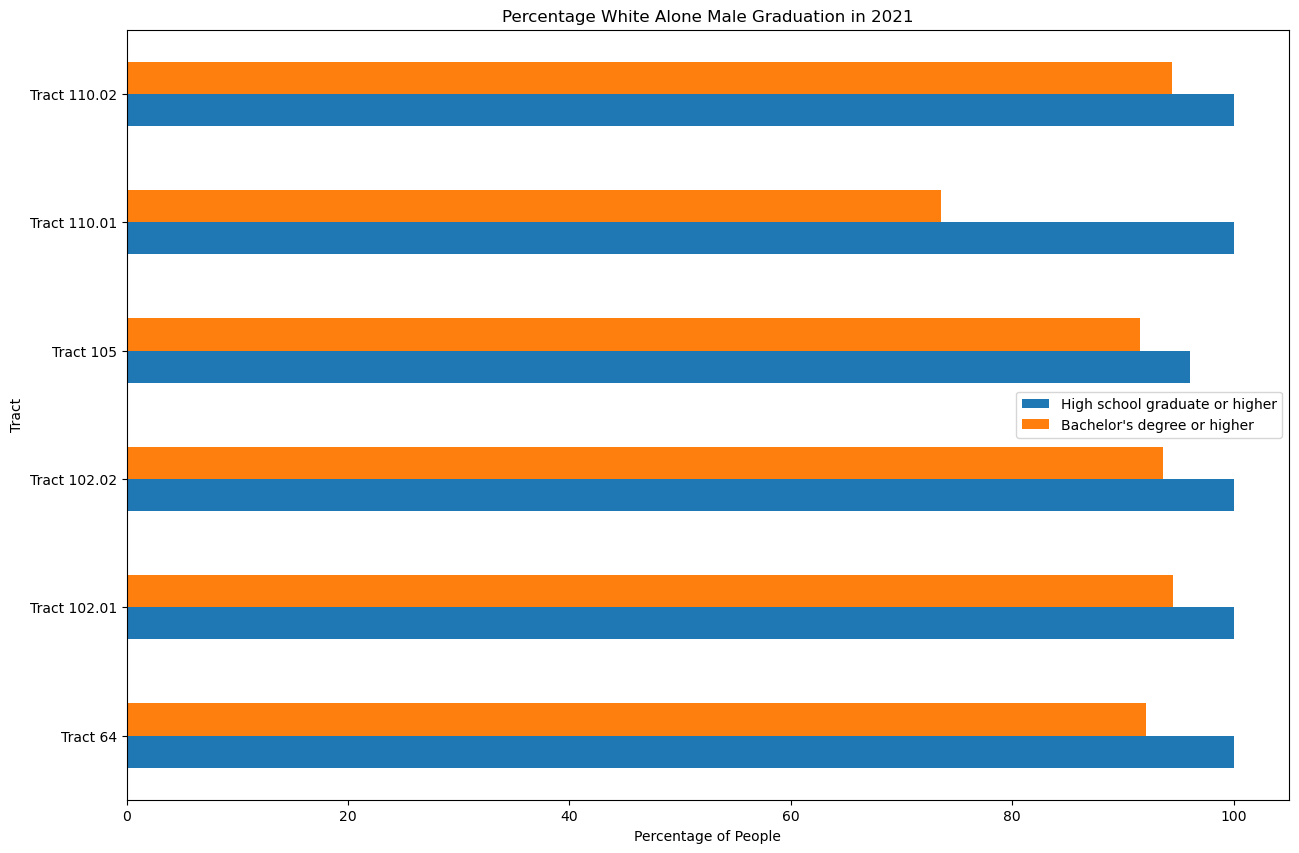

In [16]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if ('Tract' in col and 'Percent' in col and \
                                            ('Male Estimate' in col)) or 'Label (Grouping)' in col]

rows = [30, 31]
tract_data = df.loc[rows, tract_cols]

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'

for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')

for i in range(len(labels)):
    tract_data = tract_data.rename(index={30+i: labels[i]})

tract_data = tract_data.T
index = tract_data.index.values
for i in range(len(index)):
    new = index[i].replace(', Percent Male Estimate', '')
    tract_data = tract_data.rename(index={index[i]:  new})
tract_data = tract_data.T

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)
tract_data = tract_data.T

##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace('%', '').astype(float)
    
#####################

bar_plot = tract_data.plot(kind='barh', stacked=False, title='Percentage White Alone Male Graduation in 2021', figsize=(15, 10),)
bar_plot.set_xlabel('Percentage of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/white_alone_male_graduation.png')
bar_plot

<AxesSubplot:title={'center':'Percentage White Alone Female Graduation in 2021'}, xlabel='Percentage of People', ylabel='Tract'>

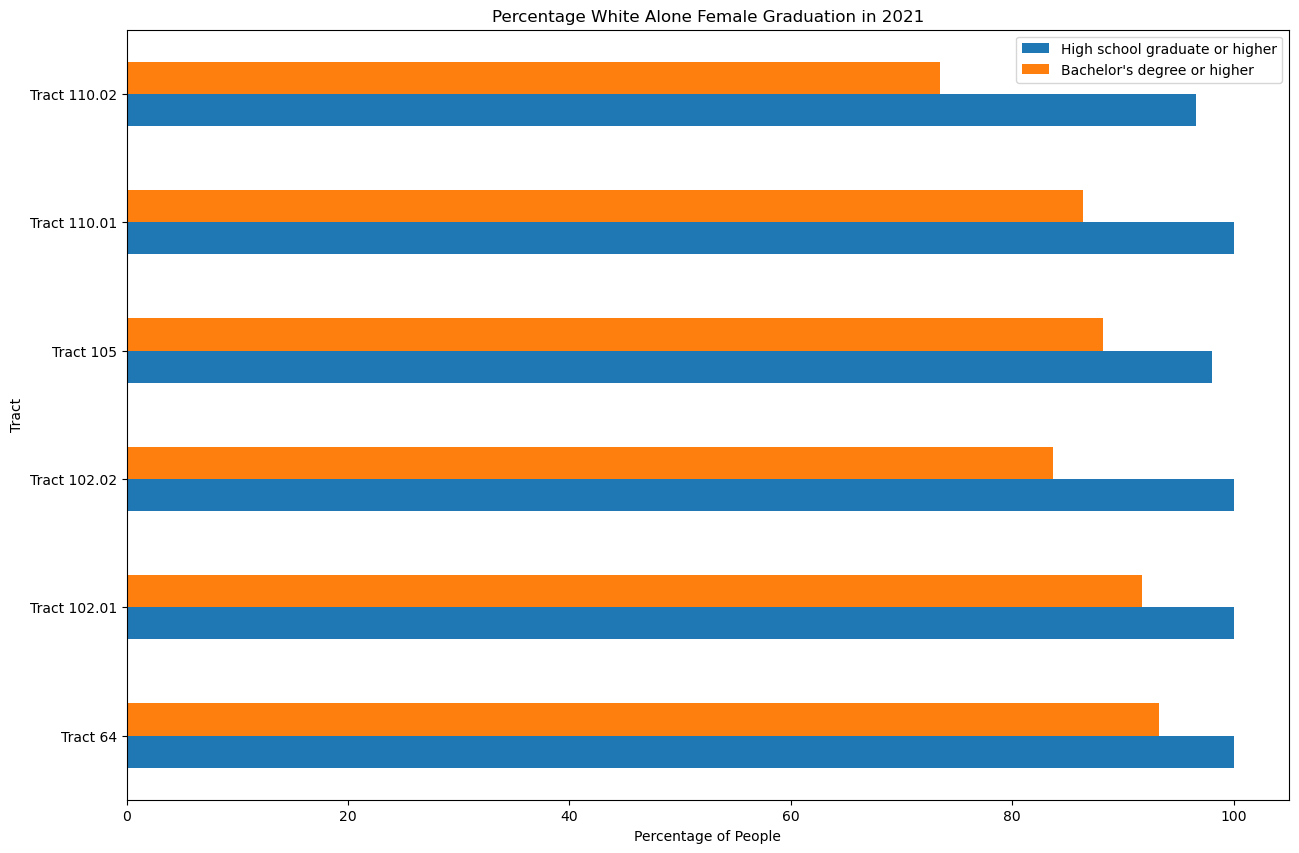

In [18]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if ('Tract' in col and 'Percent' in col and \
                                            ('Female Estimate' in col)) or 'Label (Grouping)' in col]

rows = [30, 31]
tract_data = df.loc[rows, tract_cols]

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'

for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')

for i in range(len(labels)):
    tract_data = tract_data.rename(index={30+i: labels[i]})

tract_data = tract_data.T
index = tract_data.index.values
for i in range(len(index)):
    new = index[i].replace(', Percent Female Estimate', '')
    tract_data = tract_data.rename(index={index[i]:  new})
tract_data = tract_data.T

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)
tract_data = tract_data.T

##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace('%', '').astype(float)
    
#####################

bar_plot = tract_data.plot(kind='barh', stacked=False, title='Percentage White Alone Female Graduation in 2021',\
                           figsize=(15, 10),)
bar_plot.set_xlabel('Percentage of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/white_alone_female_graduation.png')
bar_plot

<AxesSubplot:title={'center':'Percentage Black Male Graduation in 2021'}, xlabel='Percentage of People', ylabel='Tract'>

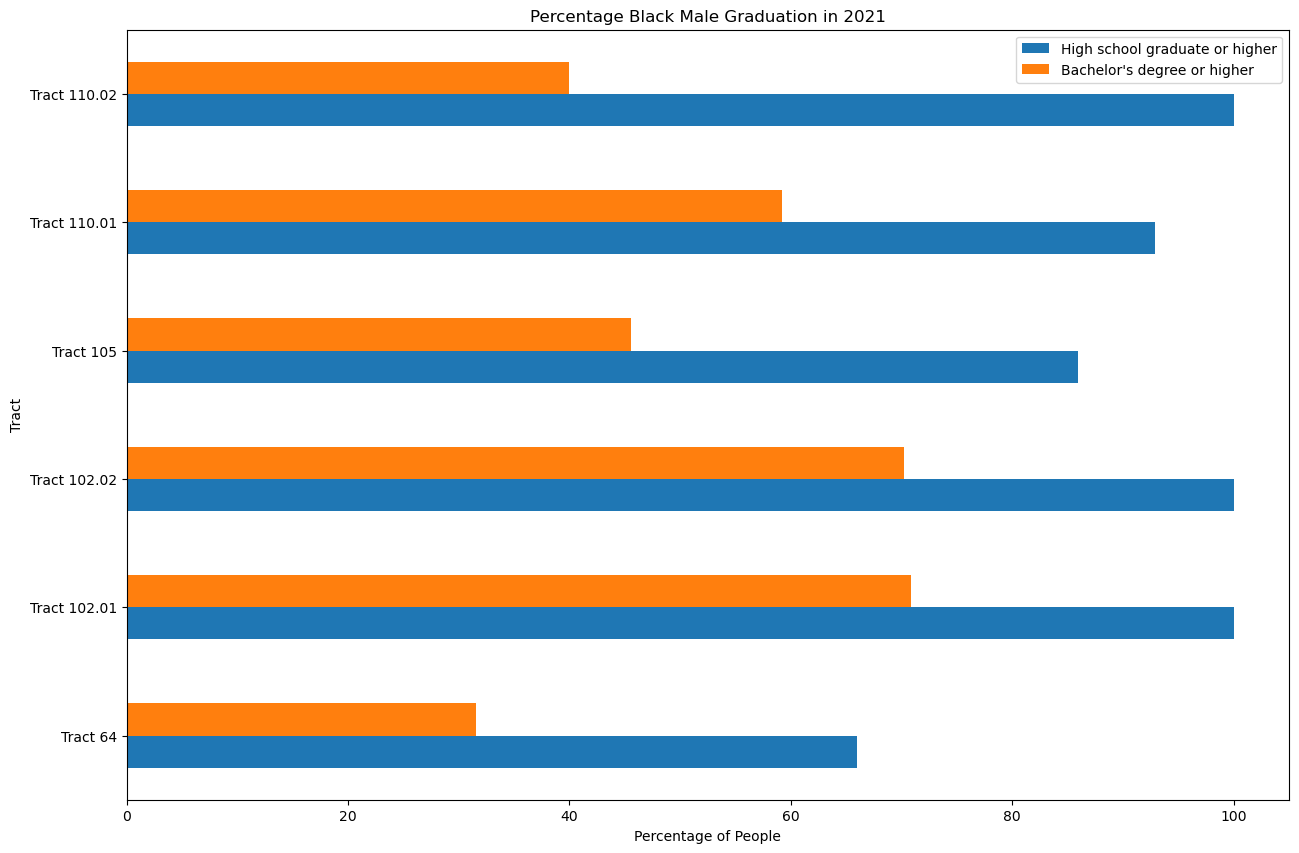

In [19]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if ('Tract' in col and 'Percent' in col and \
                                            ('Male Estimate' in col)) or 'Label (Grouping)' in col]

rows = [36, 37]
tract_data = df.loc[rows, tract_cols]

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'

for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')

for i in range(len(labels)):
    tract_data = tract_data.rename(index={36+i: labels[i]})

tract_data = tract_data.T
index = tract_data.index.values
for i in range(len(index)):
    new = index[i].replace(', Percent Male Estimate', '')
    tract_data = tract_data.rename(index={index[i]:  new})
tract_data = tract_data.T

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)
tract_data = tract_data.T

##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace('%', '').astype(float)
    
#####################

bar_plot = tract_data.plot(kind='barh', stacked=False, title='Percentage Black Male Graduation in 2021',\
                           figsize=(15, 10),)
bar_plot.set_xlabel('Percentage of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/black_alone_male_graduation.png')
bar_plot

<AxesSubplot:title={'center':'Percentage Black Female Graduation in 2021'}, xlabel='Percentage of People', ylabel='Tract'>

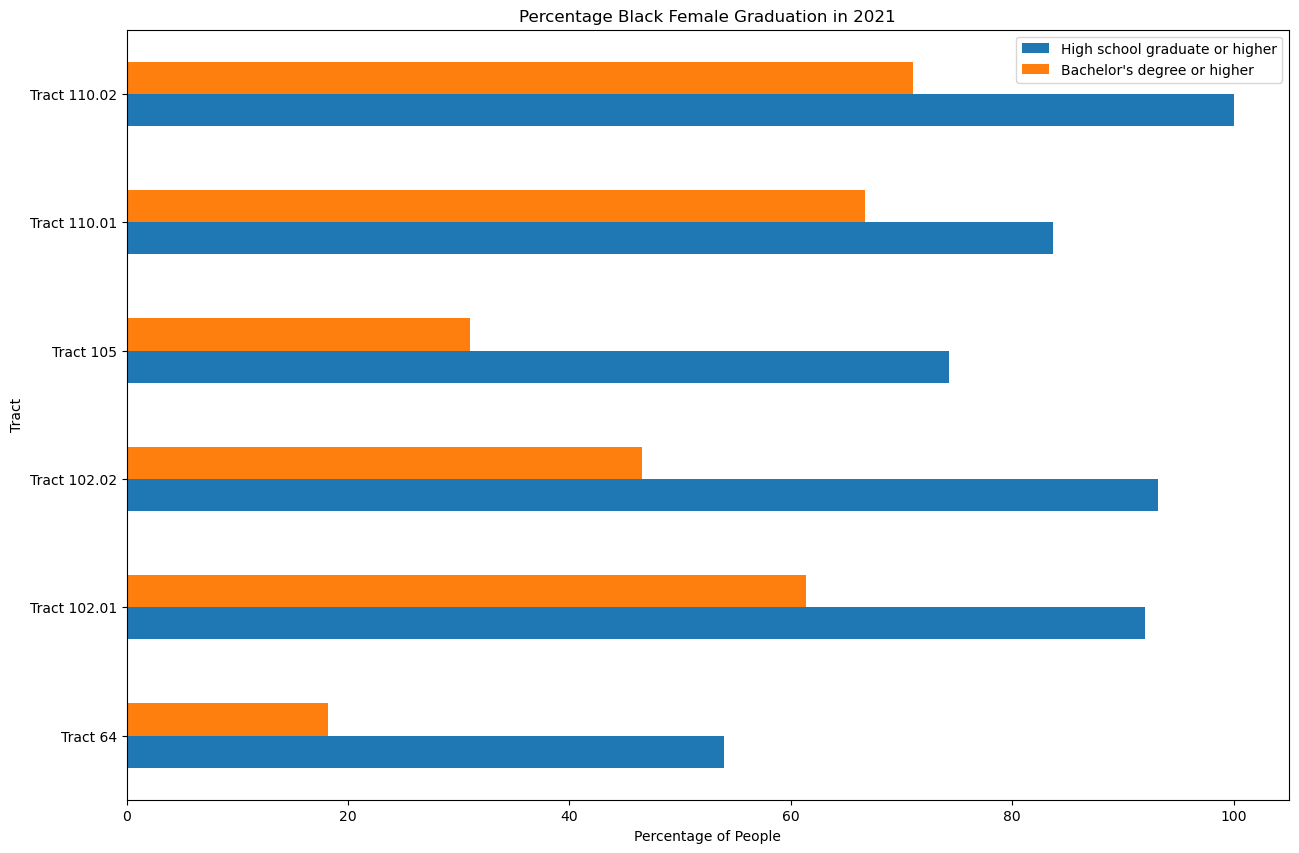

In [20]:
# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if ('Tract' in col and 'Percent' in col and \
                                            ('Female Estimate' in col)) or 'Label (Grouping)' in col]

rows = [36, 37]
tract_data = df.loc[rows, tract_cols]

##################### Rename the rows
labels = tract_data['Label (Grouping)'].values

# Get rid of the '\xa0'

for i, label in enumerate(labels):
    labels[i] = label.replace('\xa0', '')

for i in range(len(labels)):
    tract_data = tract_data.rename(index={36+i: labels[i]})

tract_data = tract_data.T
index = tract_data.index.values
for i in range(len(index)):
    new = index[i].replace(', Percent Female Estimate', '')
    tract_data = tract_data.rename(index={index[i]:  new})
tract_data = tract_data.T

##################### Drop the grouping column
tract_data = tract_data.drop(tract_data.columns[0], axis=1)
tract_data = tract_data.T

##################### Convert the columns to int
for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace('%', '').astype(float)
    
#####################

bar_plot = tract_data.plot(kind='barh', stacked=False, title='Percentage Black Female Graduation in 2021',\
                           figsize=(15, 10),)
bar_plot.set_xlabel('Percentage of People')
bar_plot.set_ylabel('Tract')
plt.savefig(f'Plots/black_alone_female_graduation.png')
bar_plot

## What are the takeaways from these graphs?

What we can see is a white-alone males and females have high graduation rates in all the selected tracts, while black-alone males and females have significantly lower graduation rates, especially in Tracts 64 and 105. With these percentages, it will be important to look at how many students of each demographic there are per the tracts; however even so, it offers valuable insights that some sort of help could help reduce these disparities.

# Education v Median Income 

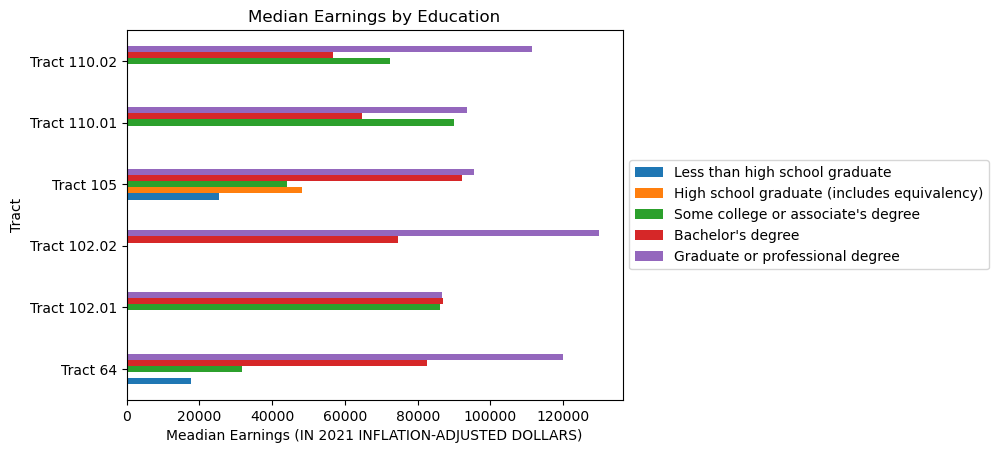

In [34]:
# This is the overall breakdown, let's try breaking down by degree

# Extract the relevant data from the DataFrame
tract_cols = [col for col in df.columns if 'Tract' in col and 'Total' in col and 'Estimate' in col]
tract_data = df.loc[63:67, tract_cols]
tract_data = tract_data.sort_index()

# Use a lambda function to remove the ', Total Estimate' suffix from each column name
tract_data.columns = tract_data.columns.map(lambda x: x.replace(', Total Estimate', ''))

# ##################### Rename the rows
labels = ['Less than high school graduate', 'High school graduate (includes equivalency)', 
          'Some college or associate\'s degree', 'Bachelor\'s degree', 'Graduate or professional degree']

for i in range(len(labels)):
    tract_data = tract_data.rename(index={63+i: labels[i]})
    
    
##################### Convert the columns to int

tract_data = tract_data.replace('-', '0')

for col in tract_data.columns:
    tract_data[col] = tract_data[col].str.replace(',', '').astype(int)
    
#####################
tract_data = tract_data.T


fig, ax = plt.subplots()
bar_plot = tract_data.plot(kind='barh', title='Median Earnings by Education', ax=ax)
bar_plot.set_xlabel('Meadian Earnings (IN 2021 INFLATION-ADJUSTED DOLLARS)')
bar_plot.set_ylabel('Tract')
# Move the legend to the right of the plot and expand the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(f'Plots/tract_18_24_breakdown.png')

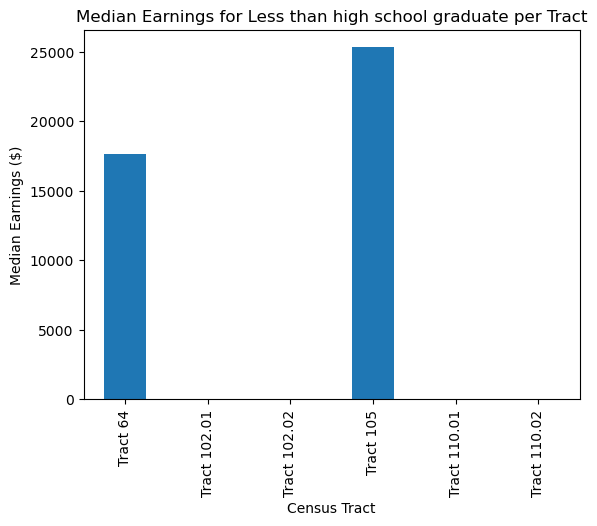

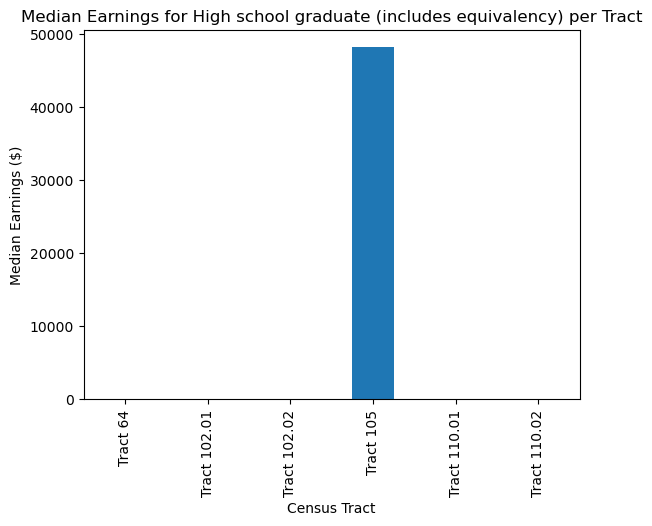

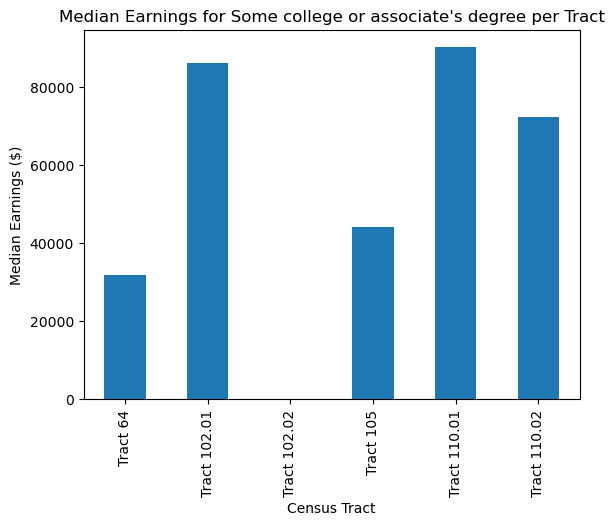

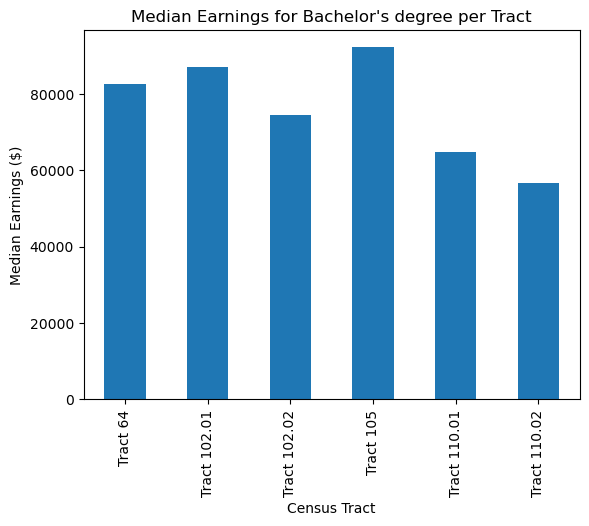

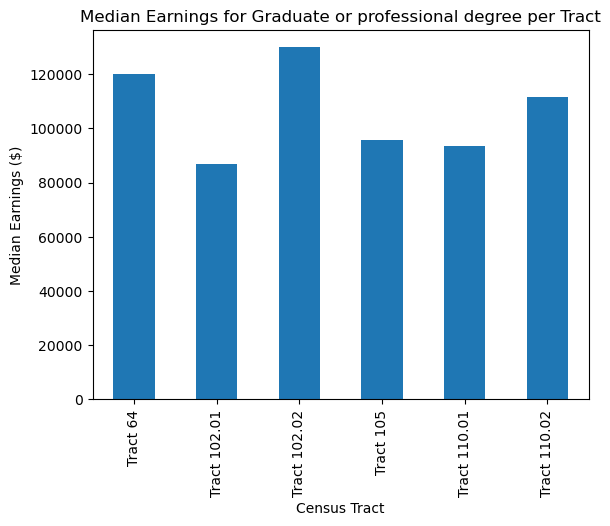

In [35]:
# Graph with Less than high school graduate, tract on y axis, earnings x-axis

for label in labels:
    education_level = tract_data[label] 
    title = f'Median Earnings for {label} per Tract'
    bar_plot = education_level.plot(kind='bar', title=title)
    bar_plot.set_ylabel('Median Earnings ($)')
    bar_plot.set_xlabel('Census Tract')
    plt.savefig(f'Plots/{title}.png')
    plt.show()

## What does this graph mean?

We can see that Tract 64 and 105 are the only ones that report some sort of earnings for those with a maximum education of high school. Their median is less than $\$$50,000 with half of those in tract 64 with less than a high school education earning less than $\$$17,500. 
<br><br>
We also see a big difference in median earning for those with either some college education or an associate's degree. With the Tract 102 and 110 medians being 2x higher than tract 105, and 3x higher than tract 64. This seems to suggest that even with some college education, the people in tracts 64 & 105 aren't able to get jobs that match their education level.
<br><br>
However when we look at a bachelor's degree or higher, we see very similar median earnings, suggesting that those with a 4-year degree or higher have very similar earning opportunities.
<br><br>
The big thing to note though, is in the previous charts we see that tracts 102 & 110 are very heavily populated with 4-year degree holders or higher, while tracts 64 and 105 contain significantly more people that have at most a high school level education. This tracks with the big differences between how many people live below the poverty line between the two tracts. To gain a better understanding of why this may be happening, we would have to obtain data specific to the junior high and high schools in the area. 

# Computer Access Analysis
Here I take a look at B28006: EDUCATIONAL ATTAINMENT BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD broken down by block group for census tracts 64, 102, 105, 110.

#### Data Loading

In [3]:
# Read in the file
computer_table_name = 'ACSDT5Y2021.B28006.csv'
computer_df = pd.read_csv(PATH + computer_table_name)

#### Data cleaning

In [23]:
print('Initial column name format: ', computer_df.columns[1])

# Filter out columns with 'Margin of Error' in their names
computer_df = computer_df.filter(regex='^(?!.*Margin of Error)')


# Rename the columns using the .str.replace() method and regex
#     This removes ', District of Columbia, District of Columbia!!Estimate' from each column
pattern = 'Block Group ([\d.]+), Census Tract ([\d\.]+), District of Columbia, District of Columbia!!([^!]+)'
replacement = r'Block Group \g<1>, Tract \g<2>'
computer_df.columns = computer_df.columns.str.replace(pattern, replacement)

print('Updated column name format: ', computer_df.columns[1])

Initial column name format:  Block Group 1, Tract 64
Updated column name format:  Block Group 1, Tract 64


C:\Users\konic\AppData\Local\Temp\ipykernel_15036\3982640668.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  computer_df.columns = computer_df.columns.str.replace(pattern, replacement)


#### Computer Access Analysis

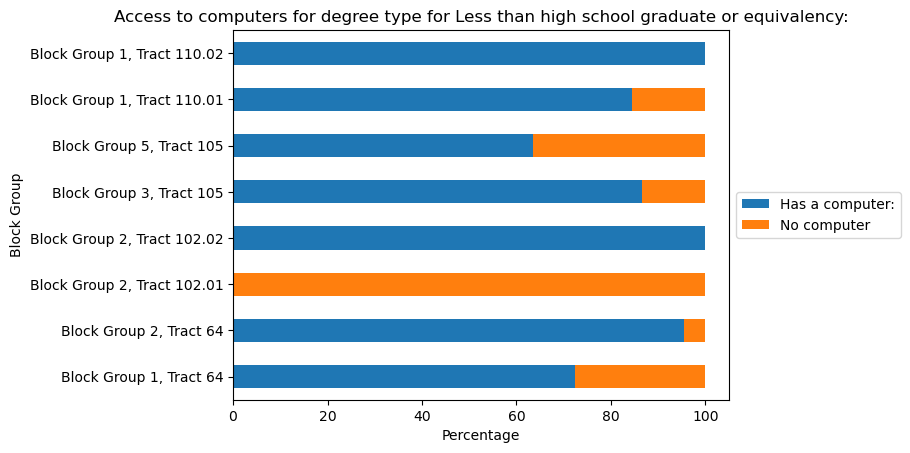

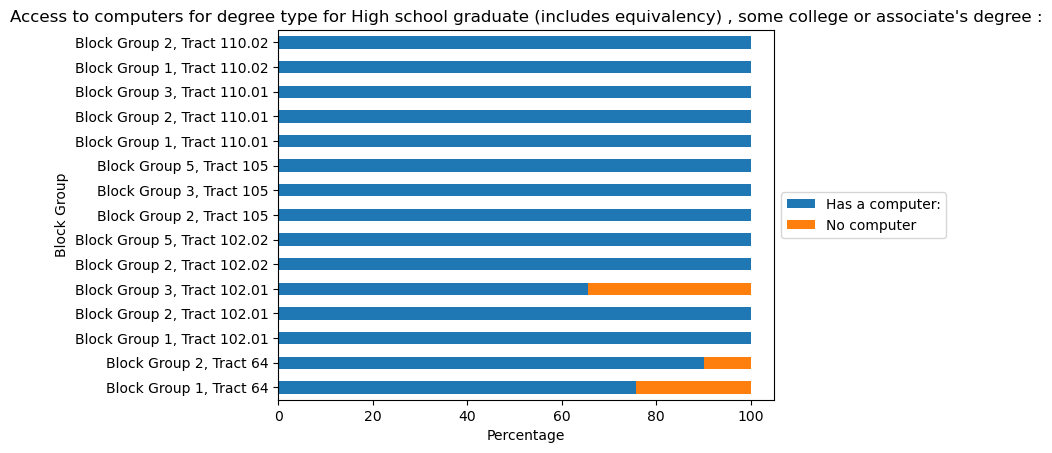

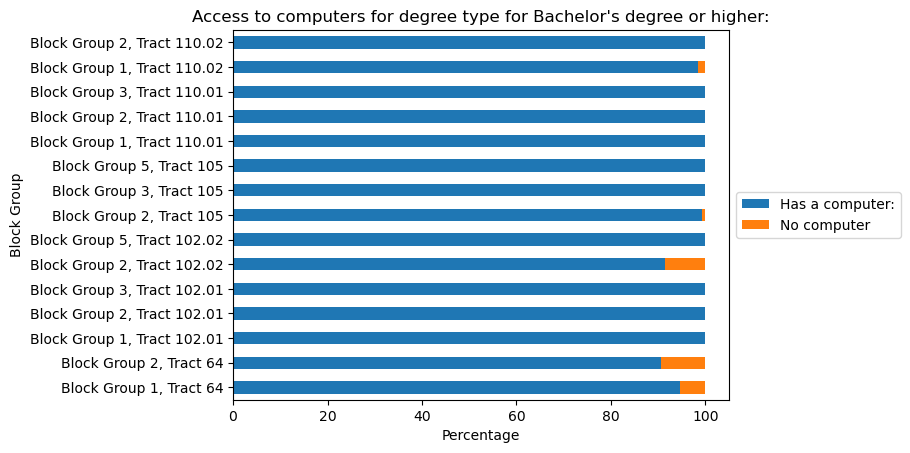

In [32]:
# Dataframe uses multiple dtypes, convert everything to string so we can remove symbols
computer_df = computer_df.astype(str)

# For each degree type
for i in range(1,14,6):
    # Get the data for that degree
    tract_data = computer_df[i:i+6]

    labels = tract_data['Label (Grouping)'].values

    # Get rid of the '\xa0'
    for j, label in enumerate(labels):
        labels[j] = label.replace('\xa0', '')

    ##################### Convert the columns to int
    tract_data = tract_data.T[1:]
    for col in tract_data.columns:
            tract_data[col] = tract_data[col].str.replace(',','').astype(float)

    for j in range(len(labels)):
        tract_data = tract_data.rename(columns={i+j: labels[j]})
    
    ##################### Remove any rows with values of 0
    # Select rows where all columns have 0
    zero_rows = tract_data[(tract_data == 0).all(axis=1)]

    # Output the resulting rows
    tract_data = tract_data.drop(zero_rows.index)
    
    ##################### Keep only 'Has a computer' and 'No computer' columns
    degree_type = tract_data.columns[0]
    
    # Total number of people of that degree per block group
    normalizing_values = tract_data.loc[:, degree_type]
    
    # Keep only these two columns
    keep_columns = ['Has a computer:', 'No computer']
    tract_data = tract_data.loc[:, keep_columns]
    
    # Normalize & turn into percents
    tract_data = tract_data.div(normalizing_values, axis=0) * 100
    
    # Plot the chart
    fig, ax = plt.subplots()
    plot = tract_data.plot(kind='barh', stacked=True, ax=ax, 
                           title=f'Access to computers for degree type for {degree_type}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Block Group')
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # Save the plot
    filename = "Plots/comp_access"
    if i == 1:
        filename += "_less_than_highschool.png"
    elif i == 7:
        filename += "_highschool_associates.png"
    elif i == 13:
        filename += "_bachelors.png"
    plt.savefig(filename, bbox_inches='tight')


### What does this graph mean?
Here we can see that most people do have computer access regardless of degree type, therefore, it's unlikely that computer access is the reason that there are such drastic differences in educational attainment between tracts.

# Trend over time analysis

This is the beginning of the trend over time analysis. However, this is where I ran into the challenge of not all the tracts being available.

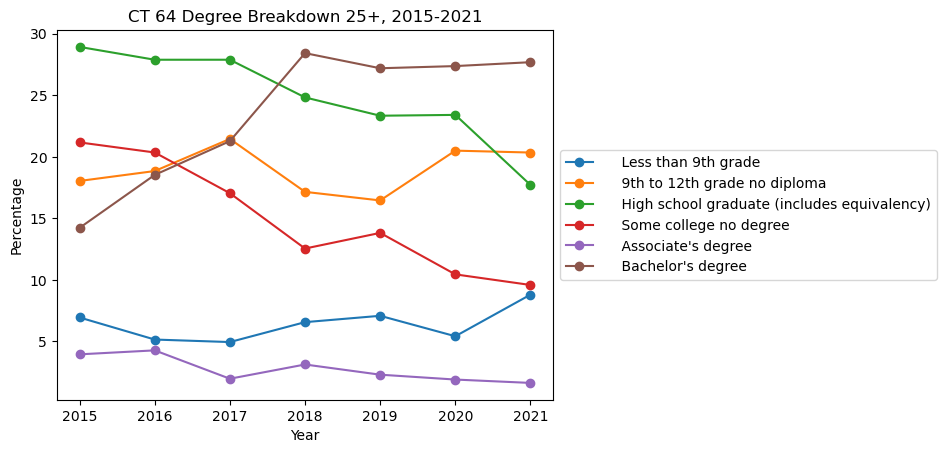

In [183]:
## Load files into df
dfs = []

# Loading in files from 2015-2021
#     I don't load the pre-2015 files because they store the data differently
for file in files[5:]:
    year = file.split('.')[0][-4:]
    
    temp_pd = pd.read_csv(PATH+file)
    temp_pd.columns = temp_pd.columns.str.replace('Census Tract ([\d\.]+), District of Columbia, District of Columbia!!([^!]+)!!([^!]+)', r'Tract \1, \2 \3', regex=True)
    
    # Get just the 25+
    temp_pd = temp_pd.iloc[6:13]
    temp_pd = temp_pd.replace(',', '', regex=True)
    
    if len(dfs) == 0:
        temp_pd = temp_pd[['Label (Grouping)', 'Tract 64, Total Estimate']]
        temp_pd.iloc[:, 1:] = temp_pd.iloc[:, 1:].astype(int)    
        temp_pd.loc[7:13, 'Tract 64, Total Estimate'] /= temp_pd.loc[6, 'Tract 64, Total Estimate'] / 100
    
    else:
        temp_pd = temp_pd[['Tract 64, Total Estimate']].astype(int)
        col_name = 'Tract 64, Total Estimate'
        divisor = temp_pd.loc[6, col_name]
        temp_pd.loc[7:12, col_name] = 100 * temp_pd.loc[7:12, col_name] / divisor 
        
    temp_pd = temp_pd.rename(columns={'Tract 64, Total Estimate': year})
    temp_pd = temp_pd.drop(index=6)
    dfs.append(temp_pd)

df_concat = pd.concat(dfs, axis=1)

df_concat = df_concat.set_index('Label (Grouping)')
df_concat = df_concat.T

fig, ax = plt.subplots()
plot = df_concat.plot(kind='line', marker='o', ax=ax, title='CT 64 Degree Breakdown 25+, 2015-2021')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
plt.savefig('Plots/ct64_degrees_2015_2021.png', bbox_inches='tight')

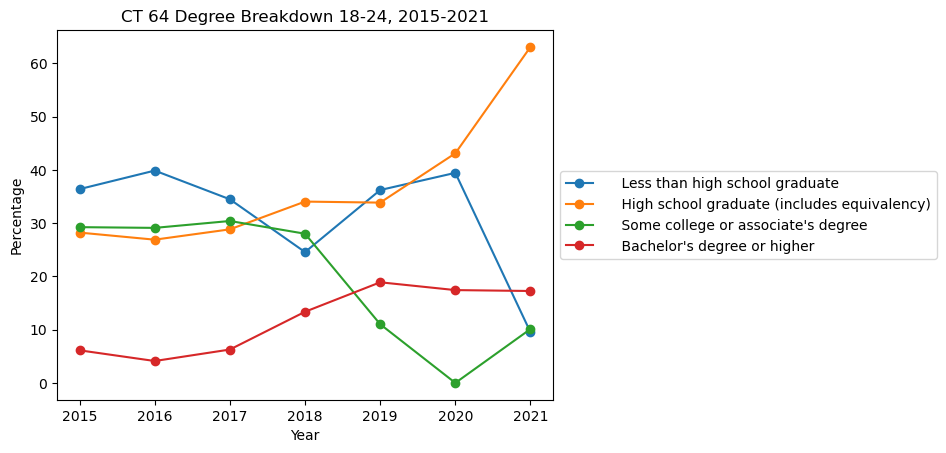

In [182]:
## Load files into df
dfs = []

# Loading in files from 2015-2021
#     I don't load the pre-2015 files because they store the data differently
for file in files[5:]:
    year = file.split('.')[0][-4:]
    
    temp_pd = pd.read_csv(PATH+file)
    temp_pd.columns = temp_pd.columns.str.replace('Census Tract ([\d\.]+), District of Columbia, District of Columbia!!([^!]+)!!([^!]+)', r'Tract \1, \2 \3', regex=True)
    
    # Get just the 25+
    temp_pd = temp_pd.iloc[1:6]
    temp_pd = temp_pd.replace(',', '', regex=True)
    
    if len(dfs) == 0:
        temp_pd = temp_pd[['Label (Grouping)', 'Tract 64, Total Estimate']]
        temp_pd.iloc[:, 1:] = temp_pd.iloc[:, 1:].astype(int)    
        temp_pd.loc[1:6, 'Tract 64, Total Estimate'] /= temp_pd.loc[1, 'Tract 64, Total Estimate'] / 100
    
    else:
        temp_pd = temp_pd[['Tract 64, Total Estimate']].astype(int)
        col_name = 'Tract 64, Total Estimate'
        divisor = temp_pd.loc[1, col_name]
        temp_pd.loc[1:6, col_name] = 100 * temp_pd.loc[1:6, col_name] / divisor 
        
    temp_pd = temp_pd.rename(columns={'Tract 64, Total Estimate': year})
    temp_pd = temp_pd.drop(index=1)
    dfs.append(temp_pd)

df_concat = pd.concat(dfs, axis=1)

df_concat = df_concat.set_index('Label (Grouping)')
df_concat = df_concat.T

fig, ax = plt.subplots()
title = "CT 64 Degree Breakdown 18-24, 2015-2021"
plot = df_concat.plot(kind='line', marker='o', ax=ax, title=title)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
plt.savefig('Plots/ct64_degrees_18_2015_2021.png', bbox_inches='tight')